In [1]:

from dask import dataframe as dd
from dask.distributed import Client, LocalCluster
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse
import pdb
import os
import glob

LABEL_PATH = '../../contiguous_session_data_labelled/'
SUMMARY_STAT_PATH = '../../summary_stats_session'


In [2]:
client = Client()
files = glob.iglob(f'{LABEL_PATH}*.csv', recursive=True)

files = sorted(files)
df = dd.read_csv(files, assume_missing=True)

2022-12-04 12:43:05,569 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-2re2bjdb', purging
2022-12-04 12:43:05,569 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-z6j10ggj', purging
2022-12-04 12:43:05,569 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-0z5s1zmc', purging
2022-12-04 12:43:05,569 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-wlpvrl2_', purging
2022-12-04 12:43:05,569 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-9y9hn2xz', purging
2022-12-04 12:43:05,569 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-vh4fqrxd', purging


In [3]:
df.columns

# get distribution of session numbers per user

session_30_dist = df.groupby('user_id')['30_minute_session_count'].max().compute()
session_30_dist = session_30_dist.reset_index()
session_30_dist.head(10)


In [ ]:
task_within_session_dist = df.groupby(['user_id', '30_minute_session_count']).size().compute().reset_index()
task_within_session_dist.columns = ['user_id', '30_minute_session_count', 'task_count']
task_within_session_dist.to_csv(f'{SUMMARY_STAT_PATH}/task_within_session_dist.csv', index=False)

In [ ]:
df['max_session_time'] = dd.to_datetime(df['max_session_time'])
df['date_time'] = dd.to_datetime(df['date_time'])


In [ ]:
# get distribution of session times per user

session_time_dist = df.groupby(['user_id', '30_minute_session_count']).apply(lambda x: x['max_session_time'].max() - x['date_time'].min()).compute().reset_index()

/tmp/ipykernel_8766/1960917034.py:3: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  session_time_dist = df.groupby(['user_id', '30_minute_session_count']).apply(lambda x: x['max_session_time'].max() - x['date_time'].min()).compute().reset_index()


In [ ]:
session_time_dist.columns = ['user_id', '30_minute_session_count', 'total_session_time']
session_time_dist.to_csv(f'{SUMMARY_STAT_PATH}/session_time_dist.csv', index=False)


[Text(0.5, 0, 'Logarithmic Number of Sessions'),
 Text(0, 0.5, 'Logarithmic Session Count'),
 Text(0.5, 1.0, 'Distribution of Session Count per User')]

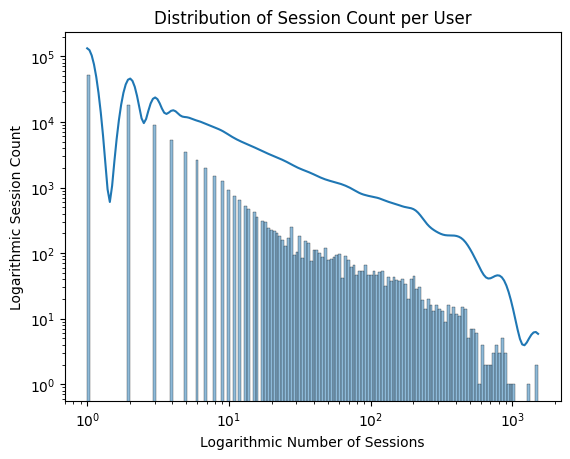

In [57]:
# plot distribution of session count per user

ax = sns.histplot(session_30_dist['30_minute_session_count'], kde=True, log_scale=(True, True), common_bins=False)
ax.set(xlabel='Logarithmic Number of Sessions', ylabel='Logarithmic Session Count', title='Distribution of Session Count per User')


In [69]:
# total session time in minutes
session_time_dist

# plot distribution of session time per user
sns.histplot(session_time_dist['total_session_time'], kde=True, log_scale=(False, True), common_bins=False)